# Laboratory Work 5

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Load the energy data from the file “En_In.xls”, which is a list of indicators of energy supply and renewable electricity production, and put into a DataFrame.

In [3]:
energy = pd.read_excel("En_In.xls")

In [4]:

energy.head(50)

energy = energy.drop(range(244, 282))
energy = energy.drop(range(17))
energy = energy.drop(columns=["Unnamed: 0", "Unnamed: 1"])
energy.columns = ["Country", "Energy Supply", "Energy Supply per Capita", "% Renewable"]

In [5]:
energy

,Country,Energy Supply,Energy Supply per Capita,% Renewable
17,Afghanistan,321,10,78.6693
18,Albania,102,35,100
19,Algeria,1959,51,0.55101
20,American Samoa,...,...,0.641026
21,Andorra,9,121,88.6957
...,...,...,...,...
239,Viet Nam,2554,28,45.3215
240,Wallis and Futuna Islands,0,26,0
241,Yemen,344,13,0
242,Zambia,400,26,99.7147


### 2. Convert ‘Energy Supply’ to gigajoules (Note: there are 1,000,000 gigajoulesin a petajoule). For all countries which have missing data (e.g. data with "...")make sure this is reflected as np.NaN values.

In [6]:
energy["Energy Supply"] = energy["Energy Supply"].apply(lambda x: x * 1000000)
energy

,Country,Energy Supply,Energy Supply per Capita,% Renewable
17,Afghanistan,321000000,10,78.6693
18,Albania,102000000,35,100
19,Algeria,1959000000,51,0.55101
20,American Samoa,.................................................,...,0.641026
21,Andorra,9000000,121,88.6957
...,...,...,...,...
239,Viet Nam,2554000000,28,45.3215
240,Wallis and Futuna Islands,0,26,0
241,Yemen,344000000,13,0
242,Zambia,400000000,26,99.7147


### 3. Rename the following list of countries:
"Republic of Korea": "South Korea",
"United States of America": "United States", "
United Kingdom of Great Britain and Northern Ireland": "United
Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"


In [7]:
energy["Country"] = energy["Country"].replace(["Republic of Korea"], "South Korea")
energy["Country"] = energy["Country"].replace(["China, Hong Kong Special Administrative Region"], "Hong Kong")
energy["Country"] = energy["Country"].replace("United States of America", "United States")
energy["Country"] = energy["Country"].replace("United Kingdom of Great Britain and Northern Ireland", "United Kingdom")

### 4. There are also several countries with numbers and/or parenthesis in their name.
Be sure to remove these, e.g. 'Bolivia (Plurinational State of)' should
be ‘Bolivia’, ‘Switzerland17’ should be Switzerland’.

In [8]:
def check_str(x):
    res = []
    for i in range(len(x)):
            if x[i].isdigit():
                pass
            elif x[i] == "(":
                break
            else:
                res.append(x[i])
    return "".join(res).rstrip()

energy["Country"] = energy["Country"].apply(lambda x: check_str(x))

In [9]:

energy.loc[energy["Country"].isin(["American Samoa", "South Korea", "Bolivia", "United States"])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
20,American Samoa,.................................................,...,0.641026
41,Bolivia,336000000,32,31.4771
181,South Korea,11007000000,221,2.27935


In [10]:
energy.tail(50)

,Country,Energy Supply,Energy Supply per Capita,% Renewable
194,Saudi Arabia,7985000000,264,0.000352
195,Senegal,154000000,11,1.99824
196,Serbia,618000000,69,27.2162
197,Seychelles,9000000,94,1.9774
198,Sierra Leone,67000000,11,64.0244
199,Singapore,1120000000,207,0
200,Sint Maarten,12000000,327,0
201,Slovakia,711000000,131,20.2171
202,Slovenia,287000000,139,31.8642
203,Solomon Islands,6000000,11,0


###  5. Next, load the GDP data from the file “gpd.csv”, 
which is a csv containing
countries’ GDP from 1960 to 2015 from World Bank.

In [11]:
gpd = pd.read_csv("gpd.csv")

### Make sure to skip the header, and rename the following list of countries:
"Korea, Rep.": "South Korea",
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"


In [12]:

headers = list(gpd.loc[3])
headers[0] = "Country"
for i in range(4, len(headers)):
    headers[i] = int(headers[i])
gpd.columns = headers
gpd = gpd.drop([0, 1, 2, 3])

In [13]:
gpd.head(1)

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
4,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN


In [14]:
gpd["Country"] = gpd["Country"].replace(["Korea, Rep."], "South Korea")
gpd["Country"] = gpd["Country"].replace(["Iran, Islamic Rep."], "Iran")
gpd["Country"] = gpd["Country"].replace(["Hong Kong SAR, China"], "Hong Kong")

In [15]:
gpd[gpd["Country"] == "Hong Kong"]

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
97,Hong Kong,HKG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,1.764691e+10,...,2.019164e+11,2.149698e+11,2.195440e+11,2.141452e+11,2.286377e+11,2.396459e+11,2.437206e+11,2.512081e+11,2.577757e+11,2.638606e+11


### 6. Load the Sciamgo Journal and Country Rank data for Energy Engineering
and Power Technology from the file “scimagojr.xlsx”, which ranks countries based on
their journal contributions in the aforementioned area.

In [16]:
sci = pd.read_excel("scimagojr.xlsx")
sci

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57
...,...,...,...,...,...,...,...,...
186,187,Guyana,1,1,0,0,0.00,0
187,188,Christmas Island,1,1,0,0,0.00,0
188,189,Reunion,1,1,2,1,2.00,1
189,190,Saint Lucia,1,1,0,0,0.00,0


### 7. Join the three datasets from tasks 1-6 into a new dataset 
(using the intersection of country names).
- Use only the last 10 years (2006-2015) of GDP data and only the top 15
countries by Scimagojr 'Rank' (Rank 1 through 15).
- The index of this DataFrame should be the name of the country, and the columns
should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '%
Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
'2015'].
You should obtain a DataFrame with 15 rows and 20 columns.

In [17]:
df = pd.merge(sci, energy, how="left", on="Country")
df = pd.merge(df, gpd, how="left", on="Country")
df = df.set_index("Country")
df = df.astype({"Rank": int})
columns_to_drop = [x for x in range(1960, 2006)]
df = df.drop(columns=columns_to_drop)
df = df.drop(columns=["Country Code", "Indicator Code", "Indicator Name"])
df = df[:15]
df

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000,93,19.7549,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,NaN,NaN,NaN,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149,10.2328,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,NaN,NaN,NaN,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000,214,17.2887,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,10431000000,296,61.9454,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,13261000000,165,17.9015,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,33195000000,26,14.9691,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,10597000000,166,17.0203,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [18]:
df.shape

(15, 20)

### 8. Create a function to define what are the top 15 countries for average GDP over the last 10 years

In [19]:
years = (x for x in range(2006, 2016))
def task8():
    df["mean"] = df[years].mean(axis=1, skipna=True)
    return df["mean"].sort_values(ascending=False)
print(task8())

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: mean, dtype: float64


### 9. Create a function to define by how much had the GDP   changed over the past 10 year for the country with the 5th largest average GDP

In [20]:
def task9():
    res = list(df.sort_values("mean", ascending=False).index.values)[4]
    return (res, df.loc[res][2015] - df.loc[res][2006])
print(task9())
df.drop(columns=["mean"])

('France', 153345695364.24023)


,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000,93,19.7549,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,NaN,NaN,NaN,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149,10.2328,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,NaN,NaN,NaN,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000,214,17.2887,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,10431000000,296,61.9454,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,13261000000,165,17.9015,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,33195000000,26,14.9691,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,10597000000,166,17.0203,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


### 10. Create a function to define what country has the maximum % Renewable and what is the percentage

In [21]:
def task10():
    res = list(df.sort_values("% Renewable", ascending=False).index.values)[0]
    return(res, df.loc[res]["% Renewable"])
print(task10())

('Brazil', 69.64803)


### 11. Create a column that estimates the population using Energy Supply and Energy
Supply per capita. What is the sixth most populous country according to this estimate

In [22]:
def task11():
    df["Population"] = df["Energy Supply"] / df["Energy Supply per Capita"]
    df
    res = list(df["Population"].sort_values(ascending=False).index.values)[5]
    return (res, df.loc[res]["Population"])
print(task11())

('Germany', 80369696.96969697)


### 12. Create a column that estimates the number of citable documents per person.
What is the correlation between the number of citable documents per capita and the
energy supply per capita? Use the .corr() method, (Pearson's correlation).

In [23]:
def task12():
    df["CitPerCap"] =  df["Citable documents"] / df["Population"]
    return df["Energy Supply per Capita"].astype('float64').corr(df['CitPerCap'].astype('float64'), method="pearson")
print(task12())

0.8642899768854406


### 13. Create a new column with a 1 if the country's % Renewable value is at or
above the median for all countries in the top 15, and a 0 if the country's %
Renewable value is below the median.

In [24]:
def task13():
    temp = df["% Renewable"].median(axis=0)
    df["renew"] = df.apply(lambda x: 1 if x["% Renewable"] >= temp else 0, axis=1)
    df.sort_values(by='Rank')
    return df["renew"]
task13()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                0
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: renew, dtype: int64

### 14. Use the following dictionary to group the Countries by Continent, then create a DataFrame
that displays the sample size (the number of countries in each continent
bin), and the sum, mean, and std deviation for the estimated population of each
country.
> ContinentDict = {'China':'Asia',<br/>
 'United States':'North America',<br/>
 'Japan':'Asia',<br/>
 'United Kingdom':'Europe',<br/>
 'Russian Federation':'Europe',<br/>
 'Canada':'North America',<br/>
 'Germany':'Europe',<br/>
 'India':'Asia',<br/>
 'France':'Europe',<br/>
 'South Korea':'Asia',<br/>
 'Italy':'Europe',<br/>
 'Spain':'Europe',<br/>
 'Iran':'Asia',<br/>
 'Australia':'Australia',<br/>
 'Brazil':'South America'}

In [25]:
def task14():
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    temp = pd.DataFrame(columns = ['size', 'sum', 'mean', 'std'])
    df['Population'] = df['Energy Supply'] / df['Energy Supply per Capita']
    for elem, val in df.groupby(ContinentDict):
        temp.loc[elem] = [len(val), val['Population'].sum(),val['Population'].mean(),val['Population'].std()]
    temp = temp.astype({"size":int})
    return temp
grouped = task14()
grouped

,size,sum,mean,std
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,3.940587e+08,7.881174e+07,3.813228e+07
North America,2,3.523986e+07,3.523986e+07,NaN
South America,1,2.059153e+08,2.059153e+08,NaN


### 15. Create a bubble chart showing % Renewable vs. Rank. 
The size of the bubble corresponds to the countries' 2015 GDP, and the color corresponds to the continent

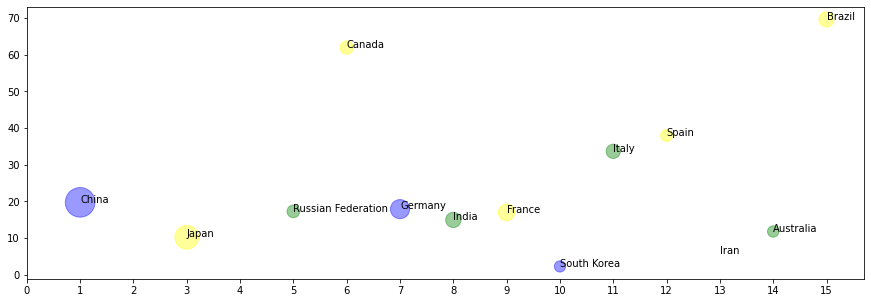

In [26]:
def task15():
    colors = ['blue', 'green', 'yellow'] * 5
    x, y = df["Rank"], df["% Renewable"]
    for i, text in enumerate(list(df.index)):
        plt.annotate(text, (x[i], y[i]))
    plt.scatter(x=x, y=y, s=df[2015] / 10000000000, alpha=0.4, c=colors)
    plt.xticks([i for i in range(0, len(list(df.index)) + 1)])
    plt.gcf().set_size_inches((15, 5))
    plt.show()
task15()